In [1]:
# GT Action (same as optim action)
from compare_methods import compute_value_and_actions
import time


pos = [-0.5, 0, 0.5, 0] # 2d position for P1 and P2 (same as above)
time_in = time.time()
optim_method = compute_value_and_actions('optim', pos=pos)
time_out = time.time()
optim_param, _ = optim_method.get_params()
total_time = time_out - time_in
total_time

241it [00:00, 513.48it/s]

[1.5643706]
[0.53020084]
[0.171275]
[0.05539881]
[0.01794104]
[0.00581811]
[0.00189029]
[0.00061639]
[0.00020282]
[6.8470836e-05]
[2.476573e-05]
[1.0550022e-05]
[5.915761e-06]


0.8426427841186523

In [2]:
actions = optim_param[:, :4].reshape(2, 2).tolist()
probs = optim_param[:, 4:6].reshape(2, 1).tolist()

In [3]:
a_sorted = [x for _,x in sorted(zip(probs, actions), reverse=True)]
p_sorted = sorted(probs, reverse=True)

In [9]:
from utils_jax import analytical_sol
import jax.numpy as jnp

x = jnp.array([-0.5, 0, 0, 0, 0.5, 0, 0, 0])
GT_action_1 = analytical_sol(x, 1, 1)[0]
GT_action_2 = analytical_sol(x, 0, 1)[0]
GT_action_1, GT_action_2

(Array([0.8333333, 1.8181818], dtype=float32),
 Array([ 0.8333333, -1.8181818], dtype=float32))

In [10]:
a_sorted, p_sorted

([[0.8328108191490173, 1.8160072565078735],
  [0.8326133489608765, -1.8149064779281616]],
 [[0.9999989867210388], [9.999999974752427e-07]])

In [7]:
import numpy as np
distances_cams = np.mean([jnp.linalg.norm(GT_action_1 - jnp.array(a_sorted[0])), jnp.linalg.norm(GT_action_2 - jnp.array(a_sorted[1]))])
distances_cams

0.0027949307

In [11]:
## Test Hexner's Game with 10-time steps
import pyspiel
import hexner_last_step
# from open_spiel.python.pytorch import deep_cfr
from open_spiel.python.visualizations import treeviz
from open_spiel.python.algorithms import cfr, exploitability
from open_spiel.python.algorithms.get_all_states import get_all_states
from open_spiel.python import policy

In [12]:
initial_state = [-0.5, 0., 0., 0., 0.5, 0., 0., 0., 0.5]
game = pyspiel.convert_to_turn_based(hexner_last_step.HexnerGame(initial_state=initial_state))

In [13]:
treeviz.GameTree(game, group_infosets=True)

In [14]:
cfr_solver= cfr.CFRPlusSolver(game)

In [15]:
from tqdm import tqdm
import time
convs = []
exps = 1e6
i = 0
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        cfr_solver.evaluate_and_update_policy()
        av_policy = cfr_solver.average_policy()
        i += 1
        pbar.update(1)
        if i % 10 == 0:
            # exps = exploitability.exploitability(game, av_policy)
            exps = exploitability.nash_conv(game, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()
print('Total Time:', time_out - time_in)

12it [00:00, 12.18it/s]

Exploitability: 0.18672762574866997


22it [00:01, 12.04it/s]

Exploitability: 0.08573564225845831


32it [00:02, 12.34it/s]

Exploitability: 0.05308287245742749


42it [00:02, 12.33it/s]

Exploitability: 0.03990108332295095


52it [00:03, 11.47it/s]

Exploitability: 0.032331532865320645


62it [00:04, 12.33it/s]

Exploitability: 0.026816718378217308


72it [00:05, 12.34it/s]

Exploitability: 0.02202743152336195


82it [00:05, 12.32it/s]

Exploitability: 0.017344614934198588


92it [00:06, 12.68it/s]

Exploitability: 0.01372321181606917


102it [00:07, 12.67it/s]

Exploitability: 0.011128030175604708


112it [00:07, 12.73it/s]

Exploitability: 0.009205004485962842


122it [00:08, 12.60it/s]

Exploitability: 0.007740571954105269


132it [00:09, 12.56it/s]

Exploitability: 0.006599712552766146


142it [00:09, 12.65it/s]

Exploitability: 0.005693672987518217


152it [00:10, 12.61it/s]

Exploitability: 0.004962167981174659


162it [00:11, 12.71it/s]

Exploitability: 0.004363086365435143


172it [00:12, 12.00it/s]

Exploitability: 0.0038662918738772145


182it [00:12, 12.31it/s]

Exploitability: 0.0034497576664704876


192it [00:13, 12.60it/s]

Exploitability: 0.003097081972267879


202it [00:14, 12.67it/s]

Exploitability: 0.0027958483774528364


212it [00:14, 12.01it/s]

Exploitability: 0.0025365178238232478


222it [00:15, 12.39it/s]

Exploitability: 0.002311664022492832


232it [00:16, 12.67it/s]

Exploitability: 0.002115435813544231


242it [00:17, 12.01it/s]

Exploitability: 0.001943172627482892


252it [00:17, 12.64it/s]

Exploitability: 0.0017911251756749236


262it [00:18, 12.89it/s]

Exploitability: 0.0016562497019392275


272it [00:19, 12.82it/s]

Exploitability: 0.0015360544591170866


282it [00:19, 12.65it/s]

Exploitability: 0.0014284837922421412


292it [00:20, 11.68it/s]

Exploitability: 0.0013318296572295552


302it [00:21, 12.58it/s]

Exploitability: 0.0012446633972713617


312it [00:21, 12.57it/s]

Exploitability: 0.0011657826446800357


322it [00:22, 12.88it/s]

Exploitability: 0.00109416963369946


332it [00:23, 12.09it/s]

Exploitability: 0.0010289582053795154


340it [00:23, 14.23it/s]

Exploitability: 0.0009694074933035424
Total Time: 23.898752212524414


In [16]:
av_policy_dict = av_policy.to_dict()
av_policy_dict.keys()

dict_keys(['Current player: 0\nGoal:2 us: op:', 'Current player: 0\nGoal:1 us: op:', 'Current player: 1\nus: op:'])

In [17]:
import numpy as np
pi_1 = av_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = av_policy_dict['Current player: 0\nGoal:2 us: op:']

p2_pi = av_policy_dict['Current player: 1\nus: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

p2_pi = np.array(p2_pi)[:, 1]

In [18]:
pi_1

array([1.07814387e-06, 1.07814387e-06, 6.28425951e-06, 3.78503720e-06,
       1.07814387e-06, 1.07814387e-06, 7.09662463e-05, 1.92912546e-05,
       1.07814387e-06, 1.07814387e-06, 1.08845848e-02, 1.71995764e-04,
       1.07814387e-06, 1.07814387e-06, 9.88454261e-01, 3.80206105e-04])

In [19]:
from itertools import product
import numpy as np
n = 4

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

In [34]:
# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# d1_exp = np.sum(np.array(_ds) * p2_pi.reshape(-1, 1), axis=0)
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_4 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)

In [32]:
distance_to_gt_4

1.0588427800973248

In [33]:
# np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])

0.5227844

In [48]:
## n = 6

n = 6

import hexner_last_step_n_6

initial_state = [-0.5, 0., 0., 0., 0.5, 0., 0., 0., 0.5]
game = pyspiel.convert_to_turn_based(hexner_last_step_n_6.HexnerGame(initial_state=initial_state))
cfr_solver= cfr.CFRPlusSolver(game)

i = 0
exps = 1e6
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        cfr_solver.evaluate_and_update_policy()
        av_policy = cfr_solver.average_policy()
        i += 1
        pbar.update(1)
        if i % 20 == 0:
            # exps = exploitability.exploitability(game, av_policy)
            exps = exploitability.nash_conv(game, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time:', time_out - time_in)

av_policy = cfr_solver.average_policy()

av_policy_dict = av_policy.to_dict()
av_policy_dict.keys()

pi_1 = av_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = av_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_6 = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_6 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)

20it [00:05,  3.75it/s]

Exploitability: 0.12683931755666844


40it [00:11,  3.66it/s]

Exploitability: 0.04887312157199819


60it [00:17,  3.71it/s]

Exploitability: 0.025864314873842442


80it [00:23,  3.69it/s]

Exploitability: 0.0166111271115994


100it [00:30,  3.57it/s]

Exploitability: 0.012275102705452845


120it [00:36,  3.78it/s]

Exploitability: 0.009885329901969775


140it [00:42,  3.70it/s]

Exploitability: 0.008417647591317912


160it [00:48,  3.75it/s]

Exploitability: 0.007442541141642334


180it [00:54,  3.82it/s]

Exploitability: 0.0067542255218813185


200it [00:59,  3.81it/s]

Exploitability: 0.006244070373772392


220it [01:06,  3.17it/s]

Exploitability: 0.005850326846762344


240it [01:12,  3.82it/s]

Exploitability: 0.005535780327820539


260it [01:18,  3.71it/s]

Exploitability: 0.005276910901024334


280it [01:24,  3.69it/s]

Exploitability: 0.005058255419074453


300it [01:30,  3.76it/s]

Exploitability: 0.004869302311745538


320it [01:36,  3.74it/s]

Exploitability: 0.004702697517474874


340it [01:43,  3.39it/s]

Exploitability: 0.0045531649354687564


360it [01:49,  3.74it/s]

Exploitability: 0.004416833691246902


380it [01:55,  3.55it/s]

Exploitability: 0.004290805932631092


400it [02:01,  3.55it/s]

Exploitability: 0.004172871596078487


420it [02:07,  3.61it/s]

Exploitability: 0.00406131560907419


440it [02:13,  3.70it/s]

Exploitability: 0.003954784734756411


460it [02:19,  3.74it/s]

Exploitability: 0.0038521937829344433


480it [02:25,  3.75it/s]

Exploitability: 0.003752658334380432


500it [02:31,  3.71it/s]

Exploitability: 0.0036554456439594762


520it [02:37,  3.71it/s]

Exploitability: 0.0035599382046009875


540it [02:43,  3.69it/s]

Exploitability: 0.0034656062470470594


560it [02:49,  3.77it/s]

Exploitability: 0.0033719866133277154


580it [02:55,  3.62it/s]

Exploitability: 0.003278666208674008


600it [03:01,  3.70it/s]

Exploitability: 0.0031852687488203024


620it [03:07,  3.49it/s]

Exploitability: 0.003091443864914445


640it [03:13,  3.59it/s]

Exploitability: 0.002996857861384039


660it [03:19,  3.60it/s]

Exploitability: 0.0029011855777019147


680it [03:26,  3.65it/s]

Exploitability: 0.0028041029048606614


700it [03:32,  3.69it/s]

Exploitability: 0.002705279564550689


720it [03:37,  3.79it/s]

Exploitability: 0.0026043717806212285


740it [03:43,  3.73it/s]

Exploitability: 0.00250101446031592


760it [03:50,  3.72it/s]

Exploitability: 0.0023948124542438887


780it [03:56,  3.79it/s]

Exploitability: 0.002285330370483507


800it [04:02,  3.73it/s]

Exploitability: 0.0021738671511899454


820it [04:08,  3.61it/s]

Exploitability: 0.0020691810559438917


840it [04:14,  3.81it/s]

Exploitability: 0.0019718788155858036


860it [04:20,  3.72it/s]

Exploitability: 0.0018812820010297715


880it [04:26,  3.56it/s]

Exploitability: 0.001796788348058187


900it [04:32,  3.77it/s]

Exploitability: 0.001717861722139058


920it [04:38,  3.78it/s]

Exploitability: 0.0016440235926008517


940it [04:44,  3.80it/s]

Exploitability: 0.0015748457621842515


960it [04:50,  3.66it/s]

Exploitability: 0.0015099441450773243


980it [04:56,  3.76it/s]

Exploitability: 0.0014489734241222019


1000it [05:02,  3.70it/s]

Exploitability: 0.0013916224480344797


1020it [05:08,  3.72it/s]

Exploitability: 0.0013376102537714374


1040it [05:14,  3.63it/s]

Exploitability: 0.0012866826188598912


1060it [05:20,  3.71it/s]

Exploitability: 0.0012386090645016834


1080it [05:26,  3.04it/s]

Exploitability: 0.0011931802433297056


1100it [05:32,  3.80it/s]

Exploitability: 0.001150205656413772


1120it [05:38,  3.70it/s]

Exploitability: 0.0011095116529267202


1140it [05:44,  3.69it/s]

Exploitability: 0.0010709396731726217


1160it [05:50,  3.67it/s]

Exploitability: 0.001034344701715706


1180it [05:57,  3.30it/s]

Exploitability: 0.0009995939023826894
Total Time: 357.2829360961914


In [50]:
distance_to_gt_6

1.1494801917079402

In [36]:
## n = 8

n = 8

import hexner_last_step_n_8

initial_state = [-0.5, 0., 0., 0., 0.5, 0., 0., 0., 0.5]
game = pyspiel.convert_to_turn_based(hexner_last_step_n_8.HexnerGame(initial_state=initial_state))
cfr_solver= cfr.CFRPlusSolver(game)

i = 0
exps = 1e6
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        cfr_solver.evaluate_and_update_policy()
        av_policy = cfr_solver.average_policy()
        i += 1
        pbar.update(1)
        if i % 40 == 0:
            # exps = exploitability.exploitability(game, av_policy)
            exps = exploitability.nash_conv(game, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time:', time_out - time_in)

av_policy_dict = av_policy.to_dict()
av_policy_dict.keys()

pi_1 = av_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = av_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_8 = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])

norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_8 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)

40it [00:33,  1.17it/s]

Exploitability: 0.06859038521202987


80it [01:08,  1.20it/s]

Exploitability: 0.03003752700153417


120it [01:44,  1.20it/s]

Exploitability: 0.017894689559324606


160it [02:19,  1.20it/s]

Exploitability: 0.011908702899504187


200it [02:55,  1.22it/s]

Exploitability: 0.008096227887807728


240it [03:31,  1.18it/s]

Exploitability: 0.006005975854819212


280it [04:07,  1.22it/s]

Exploitability: 0.004741831955166864


320it [04:42,  1.22it/s]

Exploitability: 0.0039185579992515596


360it [05:19,  1.19it/s]

Exploitability: 0.003351855712953822


400it [05:56,  1.19it/s]

Exploitability: 0.002944554696194368


440it [06:31,  1.22it/s]

Exploitability: 0.002641480583187361


480it [07:07,  1.21it/s]

Exploitability: 0.0024094176401313616


520it [07:42,  1.21it/s]

Exploitability: 0.002227399045146017


560it [08:18,  1.18it/s]

Exploitability: 0.002081660636530591


600it [08:55,  1.09it/s]

Exploitability: 0.0019628634895080266


640it [09:32,  1.16it/s]

Exploitability: 0.0018644901956275106


680it [10:09,  1.15it/s]

Exploitability: 0.0017818804094567042


720it [10:47,  1.11it/s]

Exploitability: 0.0017116301929849254


760it [11:23,  1.18it/s]

Exploitability: 0.001651206377736969


800it [12:00,  1.16it/s]

Exploitability: 0.0015986922743206344


840it [12:36,  1.18it/s]

Exploitability: 0.0015526159826224628


880it [13:13,  1.11it/s]

Exploitability: 0.0015118320031590748


920it [13:49,  1.19it/s]

Exploitability: 0.0014754380440415993


960it [14:25,  1.18it/s]

Exploitability: 0.0014427155542419134


1000it [15:01,  1.14it/s]

Exploitability: 0.0014130865534740522


1040it [15:37,  1.17it/s]

Exploitability: 0.001386081847509768


1080it [16:14,  1.16it/s]

Exploitability: 0.001361317322147948


1120it [16:50,  1.17it/s]

Exploitability: 0.001338476051583437


1160it [17:27,  1.18it/s]

Exploitability: 0.0013172946466406543


1200it [18:03,  1.17it/s]

Exploitability: 0.001297552732237972


1240it [18:39,  1.17it/s]

Exploitability: 0.001279064760386861


1280it [19:16,  1.17it/s]

Exploitability: 0.001261673584482259


1320it [19:52,  1.17it/s]

Exploitability: 0.0012452453747675563


1360it [20:28,  1.18it/s]

Exploitability: 0.00122966556429438


1400it [21:06,  1.12it/s]

Exploitability: 0.0012148355933885302


1440it [21:43,  1.16it/s]

Exploitability: 0.001200670277779925


1480it [22:19,  1.18it/s]

Exploitability: 0.0011870956674512323


1520it [22:56,  1.17it/s]

Exploitability: 0.0011740472943357894


1560it [23:33,  1.15it/s]

Exploitability: 0.0011614687301632065


1600it [24:09,  1.16it/s]

Exploitability: 0.0011493103932352922


1640it [24:46,  1.14it/s]

Exploitability: 0.001137528556176437


1680it [25:23,  1.17it/s]

Exploitability: 0.0011260845168460376


1720it [25:59,  1.16it/s]

Exploitability: 0.0011149439024257246


1760it [26:36,  1.15it/s]

Exploitability: 0.0011040760827443208


1800it [27:12,  1.16it/s]

Exploitability: 0.0010934536736383338


1840it [27:49,  1.17it/s]

Exploitability: 0.0010830521148629257


1880it [28:26,  1.15it/s]

Exploitability: 0.0010728493099920744


1920it [29:02,  1.14it/s]

Exploitability: 0.0010628253180817726


1960it [29:39,  1.10it/s]

Exploitability: 0.001052962088727738


2000it [30:16,  1.16it/s]

Exploitability: 0.001043243233629143


2040it [30:53,  1.13it/s]

Exploitability: 0.0010336538289879016


2080it [31:30,  1.16it/s]

Exploitability: 0.0010241802440302816


2120it [32:07,  1.16it/s]

Exploitability: 0.001014809991738752


2160it [32:44,  1.15it/s]

Exploitability: 0.0010055315985144642


2200it [33:23,  1.10it/s]

Exploitability: 0.0009963344900408844
Total Time: 2003.7073941230774


In [49]:
distance_to_gt_8

0.37464195668540257

In [37]:
n = 12

import hexner_last_step_n_12

initial_state = [-0.5, 0., 0., 0., 0.5, 0., 0., 0., 0.5]
game = pyspiel.convert_to_turn_based(hexner_last_step_n_12.HexnerGame(initial_state=initial_state))
cfr_solver= cfr.CFRPlusSolver(game)

i = 0
exps = 1e6
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        cfr_solver.evaluate_and_update_policy()
        av_policy = cfr_solver.average_policy()
        i += 1
        pbar.update(1)
        if i % 20 == 0:
            # exps = exploitability.exploitability(game, av_policy)
            exps = exploitability.nash_conv(game, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time:', time_out - time_in)

av_policy_dict = av_policy.to_dict()

av_policy_dict = av_policy.to_dict()
av_policy_dict.keys()

pi_1 = av_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = av_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_12 = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_12 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)

20it [01:25,  4.25s/it]

Exploitability: 0.1488812995284754


40it [03:01,  4.23s/it]

Exploitability: 0.08984875072011522


60it [04:38,  4.50s/it]

Exploitability: 0.06216912555902909


80it [06:13,  4.27s/it]

Exploitability: 0.04846874215165031


100it [07:49,  4.24s/it]

Exploitability: 0.03940908192859682


120it [09:25,  4.32s/it]

Exploitability: 0.032590985594077915


140it [11:00,  4.26s/it]

Exploitability: 0.027176645192682702


160it [12:36,  4.24s/it]

Exploitability: 0.023151083719910703


180it [14:12,  4.30s/it]

Exploitability: 0.020195432122964818


200it [15:48,  4.22s/it]

Exploitability: 0.017896901096184914


220it [17:24,  4.23s/it]

Exploitability: 0.016016603496906145


240it [19:00,  4.24s/it]

Exploitability: 0.014421876572992098


260it [20:36,  4.30s/it]

Exploitability: 0.013141872918437936


280it [22:15,  4.38s/it]

Exploitability: 0.012117583869697413


300it [23:50,  4.20s/it]

Exploitability: 0.011283213674992298


320it [25:25,  4.23s/it]

Exploitability: 0.010592828147005795


340it [26:59,  4.22s/it]

Exploitability: 0.010013570278601724


360it [28:34,  4.25s/it]

Exploitability: 0.009521433257451806


380it [30:09,  4.26s/it]

Exploitability: 0.009098545657025725


400it [31:44,  4.22s/it]

Exploitability: 0.008731380721323179


420it [33:19,  4.24s/it]

Exploitability: 0.008409546982187988


440it [34:55,  4.30s/it]

Exploitability: 0.008124954115960037


460it [36:32,  4.29s/it]

Exploitability: 0.007871226643290985


480it [38:08,  4.29s/it]

Exploitability: 0.007643284746764789


500it [39:45,  4.41s/it]

Exploitability: 0.007437039899756415


520it [41:22,  4.43s/it]

Exploitability: 0.00724917072213882


540it [42:58,  4.36s/it]

Exploitability: 0.007076955771690541


560it [44:34,  4.29s/it]

Exploitability: 0.006918147319605938


580it [46:10,  4.24s/it]

Exploitability: 0.0067708750154342745


600it [47:47,  4.28s/it]

Exploitability: 0.006633571614323319


620it [49:22,  4.26s/it]

Exploitability: 0.006504915171750669


640it [50:58,  4.26s/it]

Exploitability: 0.0063837836575041385


660it [52:34,  4.29s/it]

Exploitability: 0.006269219026389994


680it [54:11,  4.30s/it]

Exploitability: 0.006160398554663549


700it [55:47,  4.31s/it]

Exploitability: 0.00605661180567707


720it [57:23,  4.26s/it]

Exploitability: 0.005957241991012219


740it [59:02,  4.42s/it]

Exploitability: 0.0058617507888959475


760it [1:00:40,  4.51s/it]

Exploitability: 0.005769665900488219


780it [1:02:18,  4.31s/it]

Exploitability: 0.005680570788137995


800it [1:03:56,  4.29s/it]

Exploitability: 0.005594096162786499


820it [1:05:33,  4.39s/it]

Exploitability: 0.005509912881165202


840it [1:07:11,  4.39s/it]

Exploitability: 0.0054277259848738435


860it [1:08:51,  4.47s/it]

Exploitability: 0.005347269668369403


880it [1:10:31,  4.50s/it]

Exploitability: 0.005268303005508623


900it [1:12:10,  4.47s/it]

Exploitability: 0.005190606297388434


920it [1:13:48,  4.35s/it]

Exploitability: 0.005113977930199853


940it [1:15:27,  4.38s/it]

Exploitability: 0.00503823165214734


960it [1:17:03,  4.21s/it]

Exploitability: 0.004963194194566922


980it [1:18:39,  4.31s/it]

Exploitability: 0.004888703175002118


1000it [1:20:17,  4.55s/it]

Exploitability: 0.004814605229982227


1020it [1:21:53,  4.23s/it]

Exploitability: 0.004740754333068198


1040it [1:23:29,  4.24s/it]

Exploitability: 0.0046670102597661245


1060it [1:25:05,  4.19s/it]

Exploitability: 0.004593237165544606


1080it [1:26:40,  4.28s/it]

Exploitability: 0.004519302246525303


1100it [1:28:16,  4.34s/it]

Exploitability: 0.00444507445468767


1120it [1:29:54,  4.32s/it]

Exploitability: 0.0043704232406746035


1140it [1:31:29,  4.22s/it]

Exploitability: 0.004295217297553222


1160it [1:33:05,  4.31s/it]

Exploitability: 0.004220175904148915


1180it [1:34:42,  4.33s/it]

Exploitability: 0.004147709628577356


1200it [1:36:19,  4.36s/it]

Exploitability: 0.004077803585891049


1220it [1:37:56,  4.30s/it]

Exploitability: 0.004010281592565557


1240it [1:39:35,  4.32s/it]

Exploitability: 0.003944981232287814


1260it [1:41:12,  4.32s/it]

Exploitability: 0.0038817525442831347


1280it [1:42:50,  4.25s/it]

Exploitability: 0.0038204568533173333


1300it [1:44:25,  4.26s/it]

Exploitability: 0.0037609657240260663


1320it [1:46:03,  4.24s/it]

Exploitability: 0.003703160024589036


1340it [1:47:40,  4.36s/it]

Exploitability: 0.0036469290867581217


1360it [1:49:16,  4.34s/it]

Exploitability: 0.003592169950937918


1380it [1:50:53,  4.38s/it]

Exploitability: 0.003538786686489326


1400it [1:52:31,  4.39s/it]

Exploitability: 0.003486689778678498


1420it [1:54:08,  4.31s/it]

Exploitability: 0.0034357955747500446


1440it [1:55:47,  4.36s/it]

Exploitability: 0.003386025782555535


1460it [1:57:26,  4.46s/it]

Exploitability: 0.0033373070159548046


1480it [1:59:03,  4.23s/it]

Exploitability: 0.003289570381895923


1500it [2:00:39,  4.32s/it]

Exploitability: 0.0032427511046934088


1520it [2:02:13,  4.21s/it]

Exploitability: 0.003196788183539523


1540it [2:03:49,  4.38s/it]

Exploitability: 0.0031516240797276884


1560it [2:05:24,  4.22s/it]

Exploitability: 0.003107204430481847


1580it [2:07:01,  4.28s/it]

Exploitability: 0.0030634777866097584


1600it [2:08:36,  4.24s/it]

Exploitability: 0.0030203953715149945


1620it [2:10:14,  4.36s/it]

Exploitability: 0.0029779108593539494


1640it [2:11:52,  4.44s/it]

Exploitability: 0.002935980170366559


1660it [2:13:29,  4.29s/it]

Exploitability: 0.0028945612815887145


1680it [2:15:07,  4.31s/it]

Exploitability: 0.0028536140513668595


1700it [2:16:45,  4.40s/it]

Exploitability: 0.0028131000562117148


1720it [2:18:20,  4.24s/it]

Exploitability: 0.0027729824386806268


1740it [2:19:56,  4.27s/it]

Exploitability: 0.002733225765106706


1760it [2:21:33,  4.23s/it]

Exploitability: 0.002693795892064199


1780it [2:23:11,  4.34s/it]

Exploitability: 0.002654659840579998


1800it [2:24:46,  4.27s/it]

Exploitability: 0.002615785677160809


1820it [2:26:24,  4.49s/it]

Exploitability: 0.002577142400764232


1840it [2:28:07,  4.64s/it]

Exploitability: 0.0025386998349169465


1860it [2:29:44,  4.37s/it]

Exploitability: 0.0025004285242067326


1880it [2:31:21,  4.35s/it]

Exploitability: 0.0024622996344203507


1900it [2:32:59,  4.43s/it]

Exploitability: 0.002424284855631509


1920it [2:34:37,  4.33s/it]

Exploitability: 0.002386356307547688


1940it [2:36:16,  4.41s/it]

Exploitability: 0.0023484864464387023


1960it [2:37:54,  4.47s/it]

Exploitability: 0.0023106479729883


1980it [2:39:31,  4.31s/it]

Exploitability: 0.0022728137403689175


2000it [2:41:09,  4.38s/it]

Exploitability: 0.002234956661857135


2020it [2:42:48,  4.62s/it]

Exploitability: 0.002197049617246316


2040it [2:44:28,  4.39s/it]

Exploitability: 0.002159065357312251


2060it [2:46:03,  4.26s/it]

Exploitability: 0.0021209764054977986


2080it [2:47:39,  4.27s/it]

Exploitability: 0.0020827549559423453


2100it [2:49:15,  4.23s/it]

Exploitability: 0.0020443727668920664


2120it [2:50:53,  4.32s/it]

Exploitability: 0.002006070707323948


2140it [2:52:28,  4.30s/it]

Exploitability: 0.001968757951541389


2160it [2:54:04,  4.23s/it]

Exploitability: 0.0019324766176702646


2180it [2:55:40,  4.34s/it]

Exploitability: 0.0018971890381264123


2200it [2:57:21,  4.48s/it]

Exploitability: 0.0018628592492866414


2220it [2:58:58,  4.29s/it]

Exploitability: 0.0018294528998170634


2240it [3:00:34,  4.33s/it]

Exploitability: 0.0017969371647095222


2260it [3:02:11,  4.44s/it]

Exploitability: 0.0017652806646162311


2280it [3:03:49,  4.29s/it]

Exploitability: 0.0017344533901135772


2300it [3:05:24,  4.18s/it]

Exploitability: 0.0017044266305570321


2320it [3:06:59,  4.30s/it]

Exploitability: 0.0016751729072070898


2340it [3:08:32,  4.20s/it]

Exploitability: 0.0016466659103416825


2360it [3:10:08,  4.34s/it]

Exploitability: 0.0016188804400781853


2380it [3:11:44,  4.28s/it]

Exploitability: 0.0015917923506640896


2400it [3:13:21,  4.36s/it]

Exploitability: 0.0015653784980034224


2420it [3:14:58,  4.28s/it]

Exploitability: 0.0015396166902034158


2440it [3:16:34,  4.28s/it]

Exploitability: 0.0015144856409452512


2460it [3:18:10,  4.27s/it]

Exploitability: 0.001489964925504128


2480it [3:19:46,  4.29s/it]

Exploitability: 0.0014660349392311423


2500it [3:21:23,  4.28s/it]

Exploitability: 0.0014426768583601923


2520it [3:22:59,  4.28s/it]

Exploitability: 0.0014198726029759356


2540it [3:24:36,  4.28s/it]

Exploitability: 0.0013976048020181153


2560it [3:26:13,  4.31s/it]

Exploitability: 0.001375856760191696


2580it [3:27:50,  4.35s/it]

Exploitability: 0.0013546124266623494


2600it [3:29:27,  4.29s/it]

Exploitability: 0.001333856365436037


2620it [3:31:04,  4.24s/it]

Exploitability: 0.0013135737273077819


2640it [3:32:39,  4.24s/it]

Exploitability: 0.0012937502232992504


2660it [3:34:16,  4.26s/it]

Exploitability: 0.0012743720994843333


2680it [3:35:51,  4.35s/it]

Exploitability: 0.0012554261131259015


2700it [3:37:28,  4.27s/it]

Exploitability: 0.0012368995100440205


2720it [3:39:05,  4.23s/it]

Exploitability: 0.0012187800031475682


2740it [3:40:40,  4.25s/it]

Exploitability: 0.0012010557520559795


2760it [3:42:15,  4.22s/it]

Exploitability: 0.001183715343749725


2780it [3:43:53,  4.38s/it]

Exploitability: 0.0011667477741941212


2800it [3:45:30,  4.37s/it]

Exploitability: 0.0011501424308790753


2820it [3:47:06,  4.31s/it]

Exploitability: 0.0011338890762161435


2840it [3:48:47,  4.46s/it]

Exploitability: 0.0011179778317614852


2860it [3:50:27,  4.64s/it]

Exploitability: 0.0011023991631973207


2880it [3:52:03,  4.33s/it]

Exploitability: 0.001087143866049467


2900it [3:53:41,  4.40s/it]

Exploitability: 0.001072203052085774


2920it [3:55:18,  4.34s/it]

Exploitability: 0.0010575681363685918


2940it [3:56:54,  4.28s/it]

Exploitability: 0.0010432308249185285


2960it [3:58:30,  4.25s/it]

Exploitability: 0.0010291831029616283


2980it [4:00:05,  4.26s/it]

Exploitability: 0.0010154172237251124


3000it [4:01:40,  4.33s/it]

Exploitability: 0.0010019256977558122


3020it [4:03:26,  4.84s/it]

Exploitability: 0.000988701282730986
Total Time: 14606.512726068497


In [25]:
GT_action_1

Array([0.8333333, 1.8181818], dtype=float32)

In [47]:
distances = [distance_to_gt_4, distance_to_gt_6, distance_to_gt_8, distance_to_gt_12]
distances

[1.0588427800973248, 0.5626169, 0.37464195668540257, 0.09866226893665803]

([<matplotlib.axis.XTick at 0x321832400>,
 [Text(16, 0, '16'),
  Text(36, 0, '36'),
  Text(64, 0, '64'),
  Text(144, 0, '144')])

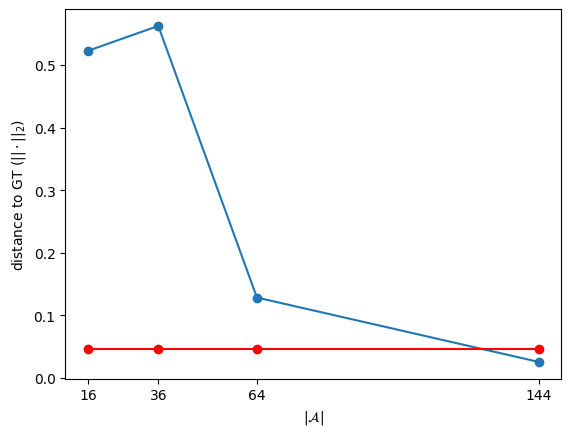

In [27]:
import numpy as np
distances_cams = np.mean([jnp.linalg.norm(GT_action_1 - jnp.array(a_sorted[0])), jnp.linalg.norm(GT_action_2 - jnp.array(a_sorted[1]))])

import matplotlib.pyplot as plt
plt.plot([16, 36, 64, 144], distances, '-o')
plt.plot([16, 36, 64, 144], [distances_cams]*4, '-o', color='red')
plt.xlabel('$|\mathcal{A}|$')
plt.ylabel('distance to GT ($||\cdot||_2$)')
plt.xticks([16, 36, 64, 144])

In [28]:
distances

[0.5227844, 0.5626169, 0.12863436, 0.025771838]

In [38]:
### now do it using mmd
from open_spiel.python.algorithms import mmd_dilated
import hexner_last_step, hexner_last_step_n_6, hexner_last_step_n_8, hexner_last_step_n_12

In [39]:
# load all games
game_16 = pyspiel.convert_to_turn_based(hexner_last_step.HexnerGame(initial_state=initial_state))
game_36 = pyspiel.convert_to_turn_based(hexner_last_step_n_6.HexnerGame(initial_state=initial_state))
game_64 = pyspiel.convert_to_turn_based(hexner_last_step_n_8.HexnerGame(initial_state=initial_state))
game_144 = pyspiel.convert_to_turn_based(hexner_last_step_n_12.HexnerGame(initial_state=initial_state))

In [40]:
# prepare solvers
mmd_solver_16 = mmd_dilated.MMDDilatedEnt(game_16, alpha=0, stepsize=40) 
mmd_solver_36 = mmd_dilated.MMDDilatedEnt(game_36, alpha=0, stepsize=40) 
mmd_solver_64 = mmd_dilated.MMDDilatedEnt(game_64, alpha=0, stepsize=40) 
mmd_solver_144 = mmd_dilated.MMDDilatedEnt(game_144, alpha=0, stepsize=40) 

In [41]:
from open_spiel.python.algorithms import exploitability
exps = 1e6
i = 0
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        mmd_solver_16.update_sequences()
        av_policy = mmd_solver_16.get_avg_policies()
        i += 1
        pbar.update(1)
        if i % 20 == 0:
            # exps = exploitability.exploitability(game_16, av_policy)
            exps = exploitability.nash_conv(game_16, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time: ', time_out - time_in)
# for i in tqdm(range(1000)):
#     mmd_solver_16.update_sequences()
    # if i % 10 == 0:
    #     exps_16.append(exploitability.exploitability(game, mmd_solver_16.get_avg_policies()))

mmd_policy_dict = mmd_solver_16.get_avg_policies().to_dict()
# mmd_policy_dict.keys()

pi_1 = mmd_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = mmd_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

n = 4
_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_mmd = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_mmd = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)
distance_to_gt_mmd

8it [00:00, 11.54it/s]/Users/mghimire/miniconda3/envs/openspiel/lib/python3.9/site-packages/open_spiel/python/algorithms/mmd_dilated.py:254: RuntimeWarning: divide by zero encountered in log
  grads[player][seq_idx] += np.log(seq / parent_seq) + 1
24it [00:02, 10.35it/s]

Exploitability: 0.10279321630923421


42it [00:03,  9.55it/s]

Exploitability: 0.05265018396326704


64it [00:05, 10.12it/s]

Exploitability: 0.03538782856547462


82it [00:07,  9.58it/s]

Exploitability: 0.02665009311720934


104it [00:09, 10.25it/s]

Exploitability: 0.02137284695538555


122it [00:10,  9.38it/s]

Exploitability: 0.017840144979288874


142it [00:12,  9.61it/s]

Exploitability: 0.015309627960949923


164it [00:14, 10.17it/s]

Exploitability: 0.013407810822943733


182it [00:16,  9.65it/s]

Exploitability: 0.01192628476516


202it [00:18,  9.78it/s]

Exploitability: 0.010739589763651525


222it [00:19,  9.44it/s]

Exploitability: 0.009767681187755395


242it [00:21,  8.80it/s]

Exploitability: 0.008957085238564089


264it [00:23,  9.93it/s]

Exploitability: 0.008270718553616607


286it [00:25, 10.89it/s]

Exploitability: 0.007682055311366454


304it [00:27, 10.15it/s]

Exploitability: 0.007171619742504687


326it [00:29, 10.63it/s]

Exploitability: 0.006724789852006086


342it [00:31,  9.63it/s]

Exploitability: 0.00633037402490888


364it [00:33, 10.32it/s]

Exploitability: 0.005979660782531648


382it [00:34,  9.39it/s]

Exploitability: 0.005665767828068158


404it [00:36, 10.29it/s]

Exploitability: 0.005383185891506104


422it [00:38,  9.27it/s]

Exploitability: 0.0051274525949974725


443it [00:40,  9.85it/s]

Exploitability: 0.004894915062344518


463it [00:42, 10.23it/s]

Exploitability: 0.004682554322112731


483it [00:43, 10.12it/s]

Exploitability: 0.004487853518698293


505it [00:45, 10.78it/s]

Exploitability: 0.0043086976896087315


523it [00:47, 10.09it/s]

Exploitability: 0.004143296626667903


541it [00:49,  9.47it/s]

Exploitability: 0.003990124847493393


561it [00:51,  9.32it/s]

Exploitability: 0.0038478744072973914


581it [00:52,  9.50it/s]

Exploitability: 0.003715417456960468


603it [00:54, 10.36it/s]

Exploitability: 0.0035917762770282247


623it [00:56, 10.03it/s]

Exploitability: 0.0034760991022444454


643it [00:58, 10.27it/s]

Exploitability: 0.0033676404719092945


663it [01:00,  9.91it/s]

Exploitability: 0.0032657451474944477


683it [01:02, 10.25it/s]

Exploitability: 0.003169834864161336


703it [01:03, 10.09it/s]

Exploitability: 0.0030793973502054595


723it [01:05, 10.08it/s]

Exploitability: 0.002993977174055251


741it [01:07,  9.82it/s]

Exploitability: 0.002913168073541139


763it [01:09,  9.92it/s]

Exploitability: 0.002836606494735827


783it [01:11, 10.03it/s]

Exploitability: 0.0027639661235517865


801it [01:12,  9.54it/s]

Exploitability: 0.002694953236571651


823it [01:14,  9.91it/s]

Exploitability: 0.002629302731417593


841it [01:16,  9.51it/s]

Exploitability: 0.0025667747235360583


861it [01:18,  9.62it/s]

Exploitability: 0.002507151617298531


881it [01:20,  9.43it/s]

Exploitability: 0.0024502355760430694


901it [01:22,  9.37it/s]

Exploitability: 0.002395846329072082


921it [01:23,  9.44it/s]

Exploitability: 0.002343819264379876


941it [01:25,  9.50it/s]

Exploitability: 0.0022940037646055345


961it [01:27,  9.36it/s]

Exploitability: 0.0022462617507741367


981it [01:29,  9.43it/s]

Exploitability: 0.0022004664041732624


1003it [01:31,  9.91it/s]

Exploitability: 0.0021565010414523744


1023it [01:33,  9.87it/s]

Exploitability: 0.0021142581219331102


1045it [01:35, 10.53it/s]

Exploitability: 0.0020736383693505944


1061it [01:36,  9.42it/s]

Exploitability: 0.002034549992925294


1085it [01:38, 10.69it/s]

Exploitability: 0.001996907994906705


1105it [01:40, 10.51it/s]

Exploitability: 0.001960633553582225


1123it [01:42, 10.13it/s]

Exploitability: 0.0019256534723406382


1141it [01:43,  9.61it/s]

Exploitability: 0.0018918996866730264


1161it [01:45,  9.28it/s]

Exploitability: 0.0018593088221308118


1181it [01:47,  9.54it/s]

Exploitability: 0.001827821797200535


1203it [01:49, 10.04it/s]

Exploitability: 0.0017973834658566723


1223it [01:51, 10.25it/s]

Exploitability: 0.0017679422952447954


1241it [01:53,  9.68it/s]

Exploitability: 0.001739450074531801


1261it [01:54,  9.90it/s]

Exploitability: 0.0017118616514621987


1281it [01:56,  9.94it/s]

Exploitability: 0.0016851346935941036


1303it [01:58,  9.98it/s]

Exploitability: 0.0016592294715557232


1323it [02:00, 10.13it/s]

Exploitability: 0.0016341086619939826


1341it [02:01,  9.65it/s]

Exploitability: 0.0016097371681536021


1363it [02:03,  9.91it/s]

Exploitability: 0.0015860819562777406


1381it [02:05,  9.45it/s]

Exploitability: 0.001563111906222825


1403it [02:07, 10.31it/s]

Exploitability: 0.0015407976748706975


1423it [02:09, 10.20it/s]

Exploitability: 0.001519111571072429


1445it [02:11, 10.42it/s]

Exploitability: 0.001498027441008909


1461it [02:12,  9.22it/s]

Exploitability: 0.0014775205629662391


1481it [02:14,  9.20it/s]

Exploitability: 0.0014575675506374175


1503it [02:16,  9.90it/s]

Exploitability: 0.0014381462641532838


1523it [02:18, 10.10it/s]

Exploitability: 0.001419235728135293


1541it [02:20,  9.46it/s]

Exploitability: 0.0014008160561284067


1561it [02:22,  9.39it/s]

Exploitability: 0.001382868380841673


1581it [02:23,  9.92it/s]

Exploitability: 0.0013653747896862356


1603it [02:25,  9.81it/s]

Exploitability: 0.0013483182651430337


1623it [02:27, 10.16it/s]

Exploitability: 0.0013316826295458606


1641it [02:29,  9.42it/s]

Exploitability: 0.0013154524939025247


1663it [02:31,  9.92it/s]

Exploitability: 0.0012996132104117208


1681it [02:33,  9.83it/s]

Exploitability: 0.0012841508283724101


1701it [02:34,  9.52it/s]

Exploitability: 0.0012690520532003813


1721it [02:36,  9.40it/s]

Exploitability: 0.0012543042083055234


1741it [02:38,  9.27it/s]

Exploitability: 0.001239895199594332


1761it [02:40,  9.83it/s]

Exploitability: 0.0012258134823929234


1781it [02:42,  9.35it/s]

Exploitability: 0.001212048030597268


1803it [02:44,  9.92it/s]

Exploitability: 0.001198588307881221


1823it [02:45, 10.27it/s]

Exploitability: 0.0011854242407984827


1841it [02:47,  9.41it/s]

Exploitability: 0.0011725461936412662


1865it [02:49, 10.61it/s]

Exploitability: 0.0011599449449187782


1883it [02:51,  9.88it/s]

Exploitability: 0.0011476116653342805


1903it [02:53,  9.84it/s]

Exploitability: 0.001135537897156258


1923it [02:55, 10.30it/s]

Exploitability: 0.0011237155348744476


1941it [02:56,  9.38it/s]

Exploitability: 0.0011121368070551307


1963it [02:58, 10.07it/s]

Exploitability: 0.001100794259303317


1981it [03:00,  9.82it/s]

Exploitability: 0.0010896807382603235


2001it [03:02,  9.83it/s]

Exploitability: 0.0010787893765585865


2023it [03:04,  9.88it/s]

Exploitability: 0.0010681135786708706


2041it [03:05,  9.42it/s]

Exploitability: 0.0010576470075913669


2063it [03:07, 10.28it/s]

Exploitability: 0.00104738357229206


2081it [03:09,  9.95it/s]

Exploitability: 0.0010373174159028498


2101it [03:11,  9.26it/s]

Exploitability: 0.0010274429045664668


2123it [03:13, 10.46it/s]

Exploitability: 0.0010177546169231055


2143it [03:14, 10.13it/s]

Exploitability: 0.001008247334186807


2160it [03:16, 10.99it/s]

Exploitability: 0.0009989160307699585
Total Time:  196.47788310050964


In [37]:
pi_1

array([2.89217955e-05, 2.89217955e-05, 2.89217964e-05, 2.89217955e-05,
       2.89217955e-05, 2.89217955e-05, 2.90477901e-05, 2.89230840e-05,
       2.89217955e-05, 2.89217955e-05, 1.59374761e-04, 2.98718912e-05,
       2.89217955e-05, 2.89217955e-05, 9.99430859e-01, 3.27056772e-05])

In [42]:
n = 6
# for _ in tqdm(range(1000)):
#     mmd_solver_36.update_sequences()

exps = 1e6
i = 0
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        mmd_solver_36.update_sequences()
        av_policy = mmd_solver_36.get_avg_policies()
        i += 1
        pbar.update(1)
        if i % 20 == 0:
            # exps = exploitability.exploitability(game_36, av_policy)
            exps = exploitability.nash_conv(game_36, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time: ', time_out - time_in)

mmd_policy_dict = mmd_solver_36.get_avg_policies().to_dict()
# mmd_policy_dict.keys()

pi_1 = mmd_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = mmd_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_mmd_36 = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_mmd_36 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)
distance_to_gt_mmd_36

20it [00:08,  2.48it/s]

Exploitability: 0.10191466539993543


41it [00:17,  1.67it/s]

Exploitability: 0.05222129322070701


61it [00:26,  1.64it/s]

Exploitability: 0.03509983924452853


80it [00:34,  2.47it/s]

Exploitability: 0.02643321644272767


100it [00:42,  2.45it/s]

Exploitability: 0.021198916222877173


120it [00:51,  2.57it/s]

Exploitability: 0.017694963129268215


142it [01:02,  1.80it/s]

Exploitability: 0.015185039281163215


160it [01:09,  2.51it/s]

Exploitability: 0.013298698997789127


180it [01:18,  2.41it/s]

Exploitability: 0.011829229495271099


200it [01:26,  2.50it/s]

Exploitability: 0.010652191734547678


220it [01:35,  2.52it/s]

Exploitability: 0.009688192482552482


240it [01:44,  2.49it/s]

Exploitability: 0.008884193106406868


260it [01:52,  2.51it/s]

Exploitability: 0.008203412025456158


280it [02:01,  2.52it/s]

Exploitability: 0.007619539283430843


300it [02:10,  2.45it/s]

Exploitability: 0.007113257603468592


320it [02:19,  2.48it/s]

Exploitability: 0.006670063983314822


340it [02:27,  2.52it/s]

Exploitability: 0.006278857884586708


360it [02:36,  2.51it/s]

Exploitability: 0.005930998722005754


380it [02:45,  2.47it/s]

Exploitability: 0.0056196602064149115


400it [02:53,  2.42it/s]

Exploitability: 0.005339377901855569


420it [03:02,  2.50it/s]

Exploitability: 0.00508572574499766


440it [03:11,  2.42it/s]

Exploitability: 0.004855080586494531


460it [03:20,  2.43it/s]

Exploitability: 0.004644448023089054


480it [03:28,  2.48it/s]

Exploitability: 0.004451331681172621


501it [03:38,  1.65it/s]

Exploitability: 0.00427363380966872


520it [03:46,  2.47it/s]

Exploitability: 0.0041095787689906516


540it [03:55,  2.44it/s]

Exploitability: 0.003957653491024171


560it [04:03,  2.55it/s]

Exploitability: 0.0038165606749448466


580it [04:12,  2.09it/s]

Exploitability: 0.003685181649989766


600it [04:21,  2.57it/s]

Exploitability: 0.0035625466533180106


620it [04:30,  2.49it/s]

Exploitability: 0.0034478108512787653


640it [04:39,  2.49it/s]

Exploitability: 0.003340234849678936


661it [04:48,  1.65it/s]

Exploitability: 0.0032391687422753668


680it [04:56,  2.11it/s]

Exploitability: 0.00314403897010862


700it [05:06,  2.53it/s]

Exploitability: 0.003054337430305365


721it [05:16,  1.61it/s]

Exploitability: 0.002969612397564547


740it [05:23,  2.47it/s]

Exploitability: 0.0028894609158489626


760it [05:32,  2.58it/s]

Exploitability: 0.002813522389808032


780it [05:40,  2.52it/s]

Exploitability: 0.002741473160875807


800it [05:49,  2.45it/s]

Exploitability: 0.0026730218959352126


820it [05:58,  2.46it/s]

Exploitability: 0.0026079056499928033


840it [06:06,  2.47it/s]

Exploitability: 0.0025458864906588996


860it [06:15,  2.50it/s]

Exploitability: 0.0024867485930826216


880it [06:24,  2.49it/s]

Exploitability: 0.0024302957305835093


900it [06:33,  2.50it/s]

Exploitability: 0.002376349099494024


920it [06:41,  2.55it/s]

Exploitability: 0.002324745427409458


940it [06:50,  2.56it/s]

Exploitability: 0.0022753353226823148


960it [06:59,  2.32it/s]

Exploitability: 0.0022279818300146026


980it [07:08,  2.45it/s]

Exploitability: 0.0021825591627362417


1000it [07:17,  2.39it/s]

Exploitability: 0.002138951587057014


1020it [07:26,  2.48it/s]

Exploitability: 0.0020970524374573918


1040it [07:34,  2.53it/s]

Exploitability: 0.002056763245575355


1060it [07:43,  2.59it/s]

Exploitability: 0.0020179929676191755


1080it [07:52,  2.51it/s]

Exploitability: 0.0019806572975430425


1100it [08:00,  2.54it/s]

Exploitability: 0.0019446780550810283


1120it [08:09,  2.52it/s]

Exploitability: 0.0019099826392898756


1140it [08:17,  2.59it/s]

Exploitability: 0.0018765035395652552


1160it [08:26,  2.52it/s]

Exploitability: 0.001844177897195709


1180it [08:34,  2.54it/s]

Exploitability: 0.0018129471114682882


1200it [08:43,  2.46it/s]

Exploitability: 0.0017827564851325972


1220it [08:52,  2.52it/s]

Exploitability: 0.001753554904704302


1240it [09:01,  2.48it/s]

Exploitability: 0.0017252945516873508


1260it [09:10,  2.14it/s]

Exploitability: 0.001697930641271883


1280it [09:19,  2.55it/s]

Exploitability: 0.0016714211855143324


1300it [09:28,  2.44it/s]

Exploitability: 0.0016457267783582807


1320it [09:36,  2.38it/s]

Exploitability: 0.0016208104001849133


1340it [09:45,  2.51it/s]

Exploitability: 0.0015966372398539264


1360it [09:54,  2.35it/s]

Exploitability: 0.0015731745324349955


1380it [10:03,  2.49it/s]

Exploitability: 0.0015503914110382988


1400it [10:12,  2.42it/s]

Exploitability: 0.001528258771337776


1420it [10:21,  2.52it/s]

Exploitability: 0.0015067491475326822


1440it [10:30,  2.48it/s]

Exploitability: 0.0014858365986427646


1460it [10:39,  2.43it/s]

Exploitability: 0.0014654966041370843


1480it [10:47,  2.56it/s]

Exploitability: 0.0014457059680244022


1501it [10:57,  1.65it/s]

Exploitability: 0.00142644273060899


1520it [11:05,  2.47it/s]

Exploitability: 0.0014076860872084263


1540it [11:14,  2.47it/s]

Exploitability: 0.0013894163132016635


1560it [11:23,  2.02it/s]

Exploitability: 0.0013716146948392627


1580it [11:32,  2.53it/s]

Exploitability: 0.001354263465303096


1600it [11:41,  2.45it/s]

Exploitability: 0.0013373457455615467


1620it [11:50,  2.45it/s]

Exploitability: 0.001320845489601541


1640it [11:58,  2.53it/s]

Exploitability: 0.0013047474336649323


1660it [12:07,  2.52it/s]

Exploitability: 0.0012890370491535075


1680it [12:16,  2.47it/s]

Exploitability: 0.0012737004988958578


1700it [12:24,  2.43it/s]

Exploitability: 0.0012587245964984506


1720it [12:33,  2.52it/s]

Exploitability: 0.0012440967685323212


1740it [12:42,  2.48it/s]

Exploitability: 0.0012298050193245702


1760it [12:51,  2.31it/s]

Exploitability: 0.001215837898151051


1780it [13:00,  2.46it/s]

Exploitability: 0.0012021844686379568


1800it [13:09,  2.47it/s]

Exploitability: 0.0011888342802020002


1820it [13:17,  2.54it/s]

Exploitability: 0.0011757773413750838


1840it [13:26,  2.49it/s]

Exploitability: 0.0011630040948636955


1860it [13:35,  2.44it/s]

Exploitability: 0.001150505394220347


1880it [13:44,  2.46it/s]

Exploitability: 0.001138272482001046


1900it [13:53,  2.43it/s]

Exploitability: 0.0011262969693026648


1920it [14:01,  2.47it/s]

Exploitability: 0.001114570816576843


1940it [14:10,  2.47it/s]

Exploitability: 0.0011030863156331616


1960it [14:19,  2.51it/s]

Exploitability: 0.0010918360727404375


1980it [14:27,  2.53it/s]

Exploitability: 0.0010808129927531995


2000it [14:36,  2.49it/s]

Exploitability: 0.0010700102641900688


2020it [14:45,  2.43it/s]

Exploitability: 0.00105942134519732


2040it [14:54,  2.51it/s]

Exploitability: 0.0010490399503400027


2060it [15:03,  2.53it/s]

Exploitability: 0.0010388600381581181


2080it [15:12,  2.47it/s]

Exploitability: 0.0010288757994444397


2101it [15:22,  1.57it/s]

Exploitability: 0.001019081646189246


2120it [15:29,  2.49it/s]

Exploitability: 0.0010094722011522173


2141it [15:39,  1.65it/s]

Exploitability: 0.001000042288016867


2160it [15:47,  2.28it/s]

Exploitability: 0.000990786922093423
Total Time:  947.8075520992279


In [52]:
n = 8
# for _ in tqdm(range(5000)):
#     mmd_solver_64.update_sequences()

exps = 1e6
i = 0
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        mmd_solver_64.update_sequences()
        av_policy = mmd_solver_64.get_avg_policies()
        i += 1
        pbar.update(1)
        if i % 20 == 0:
            # exps = exploitability.exploitability(game_64, av_policy)
            exps = exploitability.nash_conv(game_64, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time: ', time_out - time_in)

mmd_policy_dict = mmd_solver_64.get_avg_policies().to_dict()
# mmd_policy_dict.keys()

pi_1 = mmd_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = mmd_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_mmd_64 = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_mmd_64 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)

20it [00:23,  1.14s/it]

Exploitability: 0.10242629760094102


40it [00:48,  1.18s/it]

Exploitability: 0.05268333898409305


60it [01:13,  1.18s/it]

Exploitability: 0.03547016545713677


80it [01:39,  1.18s/it]

Exploitability: 0.02672900646529952


100it [02:05,  1.19s/it]

Exploitability: 0.021441043816945338


120it [02:30,  1.18s/it]

Exploitability: 0.01789853612558423


140it [02:57,  1.24s/it]

Exploitability: 0.0153601850445928


160it [03:23,  1.24s/it]

Exploitability: 0.01345222720729189


180it [03:50,  1.23s/it]

Exploitability: 0.011965837436079818


200it [04:16,  1.23s/it]

Exploitability: 0.010775220985255296


220it [04:43,  1.21s/it]

Exploitability: 0.00980009243539759


240it [05:09,  1.22s/it]

Exploitability: 0.008986808245935451


260it [05:36,  1.21s/it]

Exploitability: 0.008298164424844323


280it [06:02,  1.23s/it]

Exploitability: 0.007707547901214529


300it [06:29,  1.22s/it]

Exploitability: 0.0071954185261203785


320it [06:56,  1.24s/it]

Exploitability: 0.0067471058632149195


340it [07:22,  1.23s/it]

Exploitability: 0.006351381185127458


360it [07:49,  1.24s/it]

Exploitability: 0.005999504113164078


380it [08:15,  1.28s/it]

Exploitability: 0.005684569514722959


400it [08:42,  1.20s/it]

Exploitability: 0.005401049838406502


420it [09:08,  1.22s/it]

Exploitability: 0.005144467898416494


440it [09:35,  1.22s/it]

Exploitability: 0.004911158696700779


460it [10:01,  1.24s/it]

Exploitability: 0.004698093243490686


480it [10:28,  1.21s/it]

Exploitability: 0.004502746331082275


500it [10:54,  1.20s/it]

Exploitability: 0.004322995978544908


520it [11:20,  1.22s/it]

Exploitability: 0.004157046036950773


540it [11:47,  1.20s/it]

Exploitability: 0.004003365961647187


560it [12:13,  1.24s/it]

Exploitability: 0.003860643467471059


580it [12:40,  1.23s/it]

Exploitability: 0.0037277469625667248


600it [13:06,  1.22s/it]

Exploitability: 0.0036036954829473666


620it [13:33,  1.20s/it]

Exploitability: 0.003487634436797671


640it [13:59,  1.21s/it]

Exploitability: 0.003378815889627629


660it [14:25,  1.20s/it]

Exploitability: 0.003276582428519248


680it [14:52,  1.21s/it]

Exploitability: 0.0031803538696787426


700it [15:18,  1.25s/it]

Exploitability: 0.00308961624144255


720it [15:45,  1.24s/it]

Exploitability: 0.003003912600903491


740it [16:11,  1.23s/it]

Exploitability: 0.002922835337721308


760it [16:38,  1.22s/it]

Exploitability: 0.0028460196915260916


780it [17:04,  1.23s/it]

Exploitability: 0.002773138265366959


800it [17:31,  1.23s/it]

Exploitability: 0.0027038963611127897


820it [17:57,  1.21s/it]

Exploitability: 0.002638027996651915


840it [18:23,  1.21s/it]

Exploitability: 0.0025752924913808872


860it [18:50,  1.20s/it]

Exploitability: 0.0025154715275860218


880it [19:16,  1.22s/it]

Exploitability: 0.0024583666120899794


900it [19:42,  1.22s/it]

Exploitability: 0.002403796875972808


920it [20:09,  1.19s/it]

Exploitability: 0.0023515971609679998


940it [20:35,  1.23s/it]

Exploitability: 0.002301616349894786


960it [21:02,  1.22s/it]

Exploitability: 0.002253715905568554


980it [21:28,  1.24s/it]

Exploitability: 0.0022077685884314135


1000it [21:55,  1.23s/it]

Exploitability: 0.0021636573279234517


1020it [22:22,  1.26s/it]

Exploitability: 0.0021212742264947737


1040it [22:49,  1.23s/it]

Exploitability: 0.0020805196784353663


1060it [23:16,  1.23s/it]

Exploitability: 0.002041301588361133


1080it [23:42,  1.21s/it]

Exploitability: 0.0020035346764579742


1100it [24:09,  1.24s/it]

Exploitability: 0.0019671398594471867


1120it [24:37,  1.28s/it]

Exploitability: 0.001932043697815744


1140it [25:04,  1.29s/it]

Exploitability: 0.0018981779011841837


1160it [25:30,  1.24s/it]

Exploitability: 0.0018654788847988213


1180it [25:58,  1.27s/it]

Exploitability: 0.0018338873710852521


1200it [26:24,  1.25s/it]

Exploitability: 0.0018033480310171157


1220it [26:51,  1.21s/it]

Exploitability: 0.001773809160730111


1240it [27:18,  1.24s/it]

Exploitability: 0.001745222389404666


1260it [27:45,  1.22s/it]

Exploitability: 0.0017175424149500351


1280it [28:12,  1.23s/it]

Exploitability: 0.0016907267644430402


1300it [28:39,  1.26s/it]

Exploitability: 0.0016647355766730154


1320it [29:06,  1.25s/it]

Exploitability: 0.0016395314044295173


1340it [29:32,  1.26s/it]

Exploitability: 0.0016150790344900967


1360it [29:59,  1.26s/it]

Exploitability: 0.0015913453234761565


1380it [30:26,  1.24s/it]

Exploitability: 0.0015682990479731762


1400it [30:53,  1.23s/it]

Exploitability: 0.0015459107674882233


1420it [31:19,  1.22s/it]

Exploitability: 0.001524152698980652


1440it [31:46,  1.21s/it]

Exploitability: 0.0015029986018395558


1460it [32:12,  1.20s/it]

Exploitability: 0.0014824236723143258


1480it [32:39,  1.22s/it]

Exploitability: 0.0014624044464897068


1500it [33:06,  1.21s/it]

Exploitability: 0.0014429187110266417


1520it [33:33,  1.24s/it]

Exploitability: 0.0014239454209411528


1540it [34:00,  1.28s/it]

Exploitability: 0.0014054646237841029


1560it [34:26,  1.20s/it]

Exploitability: 0.0013874573896546227


1580it [34:53,  1.24s/it]

Exploitability: 0.001369905746521849


1600it [35:20,  1.24s/it]

Exploitability: 0.0013527926203944496


1620it [35:47,  1.21s/it]

Exploitability: 0.0013361017799209396


1640it [36:13,  1.23s/it]

Exploitability: 0.0013198177850402004


1660it [36:40,  1.23s/it]

Exploitability: 0.0013039259393448077


1680it [37:07,  1.29s/it]

Exploitability: 0.0012884122458364233


1700it [37:34,  1.24s/it]

Exploitability: 0.0012732633658147918


1720it [38:01,  1.27s/it]

Exploitability: 0.0012584665806226747


1740it [38:28,  1.24s/it]

Exploitability: 0.0012440097560320051


1760it [38:55,  1.25s/it]

Exploitability: 0.0012298813090583227


1780it [39:22,  1.22s/it]

Exploitability: 0.0012160701770084215


1800it [39:49,  1.22s/it]

Exploitability: 0.0012025657885903485


1820it [40:16,  1.25s/it]

Exploitability: 0.0011893580369310985


1840it [40:42,  1.22s/it]

Exploitability: 0.001176437254346574


1860it [41:09,  1.27s/it]

Exploitability: 0.001163794188743461


1880it [41:36,  1.21s/it]

Exploitability: 0.001151419981526458


1900it [42:02,  1.23s/it]

Exploitability: 0.0011393061468969456


1920it [42:29,  1.21s/it]

Exploitability: 0.0011274445524473986


1940it [42:55,  1.27s/it]

Exploitability: 0.0011158274009538394


1960it [43:22,  1.23s/it]

Exploitability: 0.0011044472132849537


1980it [43:49,  1.27s/it]

Exploitability: 0.0010932968123429365


2000it [44:16,  1.24s/it]

Exploitability: 0.0010823693079716756


2020it [44:43,  1.26s/it]

Exploitability: 0.0010716580827567768


2040it [45:10,  1.32s/it]

Exploitability: 0.0010611567786629195


2060it [45:37,  1.24s/it]

Exploitability: 0.0010508592844498121


2080it [46:03,  1.22s/it]

Exploitability: 0.0010407597238114574


2100it [46:30,  1.23s/it]

Exploitability: 0.001030852444193986


2120it [46:57,  1.24s/it]

Exploitability: 0.0010211320062477602


2140it [47:24,  1.26s/it]

Exploitability: 0.0010115931738678974


2160it [47:51,  1.23s/it]

Exploitability: 0.0010022309047903466


2180it [48:20,  1.33s/it]

Exploitability: 0.0009930403417015565
Total Time:  2900.53639793396


In [43]:
mmd_solver_144 = mmd_dilated.MMDDilatedEnt(game_144, alpha=0, stepsize=40) 

In [53]:
n = 12
# for _ in tqdm(range(5000)):
#     mmd_solver_144.update_sequences()
exps = 1e6
i = 0
time_in = time.time()
with tqdm() as pbar:
    while exps > 1e-3:
        mmd_solver_144.update_sequences()
        av_policy = mmd_solver_144.get_avg_policies()
        i += 1
        pbar.update(1)
        if i % 20 == 0:
            # exps = exploitability.exploitability(game_144, av_policy)
            exps = exploitability.nash_conv(game_144, av_policy, return_only_nash_conv=False).player_improvements[0]
            print(f'Exploitability: {exps}')
time_out = time.time()

print('Total Time: ', time_out - time_in)

mmd_policy_dict = mmd_solver_144.get_avg_policies().to_dict()
# mmd_policy_dict.keys()

pi_1 = mmd_policy_dict['Current player: 0\nGoal:1 us: op:']
pi_2 = mmd_policy_dict['Current player: 0\nGoal:2 us: op:']

pi_1 = np.array(pi_1)[:, 1]
pi_2 = np.array(pi_2)[:, 1]

ux_max = 0.99
uy_max = 3.947
dx_max = 0.99
dy_max = 0.99

_uxs = np.linspace(-ux_max, ux_max, n)
_uys = np.linspace(-uy_max, uy_max, n)
_dxs = np.linspace(-dx_max, dx_max, n)
_dys = np.linspace(-dy_max, dy_max, n)
_us = list(product(_uxs, _uys))
_ds = list(product(_dxs, _dys))

# u1_exp = np.sum(np.array(_us) * pi_1.reshape(-1, 1), axis=0)
# u2_exp = np.sum(np.array(_us) * pi_2.reshape(-1, 1), axis=0)

# distance_to_gt_mmd_144 = np.mean([np.linalg.norm(GT_action_1 - u1_exp), np.linalg.norm(GT_action_2 - u2_exp)])
norm_diff_1 = np.linalg.norm(np.array(_us) - GT_action_1, axis=1)
norm_diff_2 = np.linalg.norm(np.array(_us) - GT_action_2, axis=1)

distance_to_gt_mmd_144 = norm_diff_1.dot(pi_1) + norm_diff_2.dot(pi_2)
distance_to_gt_mmd_144

20it [02:03,  6.13s/it]

Exploitability: 0.04434366373044951


40it [04:16,  6.23s/it]

Exploitability: 0.03149106576216254


60it [06:29,  6.18s/it]

Exploitability: 0.024414449356059298


80it [08:42,  6.13s/it]

Exploitability: 0.01993473514113453


100it [10:55,  6.22s/it]

Exploitability: 0.016844078590017242


120it [13:10,  6.14s/it]

Exploitability: 0.014583128446617577


140it [15:24,  6.12s/it]

Exploitability: 0.01285731442941096


160it [17:39,  6.13s/it]

Exploitability: 0.011496752055934922


180it [19:53,  6.18s/it]

Exploitability: 0.010396584395080621


200it [22:09,  6.30s/it]

Exploitability: 0.009488585757955192


220it [24:21,  6.04s/it]

Exploitability: 0.008726450355709958


240it [26:34,  6.08s/it]

Exploitability: 0.008077643637813159


260it [28:46,  6.16s/it]

Exploitability: 0.0075186371576880795


280it [30:58,  6.15s/it]

Exploitability: 0.00703199397596066


300it [33:10,  6.09s/it]

Exploitability: 0.006604517138515842


320it [35:28,  6.29s/it]

Exploitability: 0.006226034781007916


340it [37:41,  6.18s/it]

Exploitability: 0.005888580321332437


360it [39:54,  6.11s/it]

Exploitability: 0.0055858255490279785


380it [42:08,  6.14s/it]

Exploitability: 0.005312680045407858


400it [44:20,  6.14s/it]

Exploitability: 0.00506500265401344


420it [46:32,  6.05s/it]

Exploitability: 0.00483939006363443


440it [48:46,  6.25s/it]

Exploitability: 0.004633019485227652


460it [51:01,  6.12s/it]

Exploitability: 0.0044435299357297176


480it [53:16,  6.22s/it]

Exploitability: 0.004268931509963991


500it [55:32,  6.27s/it]

Exploitability: 0.004107535233594861


520it [57:47,  6.21s/it]

Exploitability: 0.003957898248764913


540it [1:00:02,  6.19s/it]

Exploitability: 0.003818780559880164


560it [1:02:17,  6.28s/it]

Exploitability: 0.00368911059180288


580it [1:04:29,  6.12s/it]

Exploitability: 0.0035679575346012626


600it [1:06:45,  6.29s/it]

Exploitability: 0.0034545089643429616


620it [1:09:02,  6.26s/it]

Exploitability: 0.0033480526018060397


640it [1:11:14,  6.07s/it]

Exploitability: 0.0032479613431565246


660it [1:13:30,  6.34s/it]

Exploitability: 0.0031536808977820074


680it [1:15:46,  6.32s/it]

Exploitability: 0.003064719518437231


700it [1:18:03,  6.24s/it]

Exploitability: 0.0029806394219087373


720it [1:20:20,  6.33s/it]

Exploitability: 0.002901049584208115


740it [1:22:33,  6.14s/it]

Exploitability: 0.002825599660041034


760it [1:24:45,  6.04s/it]

Exploitability: 0.002753974827086836


780it [1:26:56,  6.04s/it]

Exploitability: 0.002685891395020845


800it [1:29:07,  6.04s/it]

Exploitability: 0.0026210930501472385


820it [1:31:19,  6.06s/it]

Exploitability: 0.0025593476308269913


840it [1:33:30,  6.03s/it]

Exploitability: 0.002500444348183861


860it [1:35:42,  6.07s/it]

Exploitability: 0.0024441913819706063


880it [1:37:55,  6.15s/it]

Exploitability: 0.0023904137938087766


900it [1:40:07,  6.11s/it]

Exploitability: 0.0023389517099801083


920it [1:42:21,  6.12s/it]

Exploitability: 0.002289658734005995


940it [1:44:33,  6.12s/it]

Exploitability: 0.0022424005558014937


960it [1:46:45,  6.14s/it]

Exploitability: 0.0021970537295977755


980it [1:48:58,  6.07s/it]

Exploitability: 0.002153504597197431


1000it [1:51:11,  6.21s/it]

Exploitability: 0.002111648336804106


1020it [1:53:24,  6.13s/it]

Exploitability: 0.002071388120659323


1040it [1:55:36,  6.09s/it]

Exploitability: 0.0020326343672329994


1060it [1:57:48,  6.01s/it]

Exploitability: 0.0019953040758231566


1080it [2:00:02,  6.16s/it]

Exploitability: 0.001959320233157591


1100it [2:02:14,  6.10s/it]

Exploitability: 0.0019246112830575424


1120it [2:04:24,  5.92s/it]

Exploitability: 0.0018911106514987175


1140it [2:06:32,  5.90s/it]

Exploitability: 0.0018587563204208735


1160it [2:08:41,  5.95s/it]

Exploitability: 0.0018274904445516604


1180it [2:10:52,  6.11s/it]

Exploitability: 0.001797259006262708


1200it [2:13:04,  5.93s/it]

Exploitability: 0.0017680115041267541


1220it [2:15:14,  5.91s/it]

Exploitability: 0.0017397006713948393


1240it [2:17:22,  5.98s/it]

Exploitability: 0.0017122822210972055


1260it [2:19:34,  5.98s/it]

Exploitability: 0.0016857146148731017


1280it [2:21:42,  5.94s/it]

Exploitability: 0.0016599588529959686


1300it [2:23:52,  6.02s/it]

Exploitability: 0.0016349782833497972


1320it [2:26:01,  5.92s/it]

Exploitability: 0.001610738427406777


1340it [2:28:11,  5.94s/it]

Exploitability: 0.0015872068214548563


1360it [2:30:23,  6.03s/it]

Exploitability: 0.0015643528715416632


1380it [2:32:33,  5.93s/it]

Exploitability: 0.001542147720774767


1400it [2:34:43,  5.92s/it]

Exploitability: 0.0015205641277622473


1420it [2:36:51,  5.91s/it]

Exploitability: 0.0014995763551222119


1440it [2:39:03,  6.11s/it]

Exploitability: 0.0014791600671012484


1460it [2:41:14,  5.98s/it]

Exploitability: 0.0014592922354411675


1480it [2:43:23,  5.94s/it]

Exploitability: 0.0014399510527315362


1500it [2:45:31,  5.87s/it]

Exploitability: 0.0014211158525647694


1520it [2:47:40,  5.94s/it]

Exploitability: 0.0014027670358758293


1540it [2:49:49,  5.88s/it]

Exploitability: 0.0013848860029140875


1560it [2:51:57,  5.88s/it]

Exploitability: 0.0013674550903531868


1580it [2:54:05,  5.88s/it]

Exploitability: 0.0013504575130955931


1600it [2:56:13,  5.85s/it]

Exploitability: 0.0013338773103567236


1620it [2:58:20,  5.82s/it]

Exploitability: 0.001317699295677266


1640it [3:00:29,  5.87s/it]

Exploitability: 0.0013019090105279574


1660it [3:02:37,  5.91s/it]

Exploitability: 0.0012864926812150568


1680it [3:04:45,  5.84s/it]

Exploitability: 0.0012714371788012935


1700it [3:06:52,  5.97s/it]

Exploitability: 0.0012567299818234678


1720it [3:09:01,  5.94s/it]

Exploitability: 0.001242359141549798


1740it [3:11:11,  6.06s/it]

Exploitability: 0.0012283132496169191


1760it [3:13:22,  6.06s/it]

Exploitability: 0.0012145814078099448


1780it [3:15:29,  5.79s/it]

Exploitability: 0.0012011531998736835


1800it [3:17:36,  5.92s/it]

Exploitability: 0.0011880186651566094


1820it [3:19:42,  5.84s/it]

Exploitability: 0.0011751682739707947


1840it [3:21:50,  5.90s/it]

Exploitability: 0.001162592904533244


1860it [3:23:58,  5.85s/it]

Exploitability: 0.0011502838213716116


1880it [3:26:03,  5.76s/it]

Exploitability: 0.001138232655092608


1900it [3:28:09,  5.78s/it]

Exploitability: 0.001126431383396076


1920it [3:30:20,  5.99s/it]

Exploitability: 0.001114872313274562


1940it [3:32:32,  6.11s/it]

Exploitability: 0.0011035480642818118


1960it [3:34:44,  5.89s/it]

Exploitability: 0.0010924515528265566


1980it [3:36:52,  5.90s/it]

Exploitability: 0.00108157597738745


2000it [3:39:00,  6.04s/it]

Exploitability: 0.00107091480461885


2020it [3:41:09,  5.98s/it]

Exploitability: 0.0010604617562577356


2040it [3:43:23,  6.29s/it]

Exploitability: 0.001050210796796125


2060it [3:45:35,  5.91s/it]

Exploitability: 0.001040156121863589


2080it [3:47:44,  5.96s/it]

Exploitability: 0.0010302921472596926


2100it [3:49:52,  6.13s/it]

Exploitability: 0.0010206134986247006


2120it [3:52:01,  5.86s/it]

Exploitability: 0.0010111150016620662


2140it [3:54:11,  6.01s/it]

Exploitability: 0.001001791672924135


2160it [3:56:29,  6.57s/it]

Exploitability: 0.000992638711088234
Total Time:  14189.047006130219


0.07065840307433174

In [54]:
distances_mmd = [distance_to_gt_mmd, distance_to_gt_mmd_36, distance_to_gt_mmd_64, distance_to_gt_mmd_144]
distances_mmd

[1.0552507678615948,
 1.146136600348143,
 0.36045590244936615,
 0.07065840307433174]

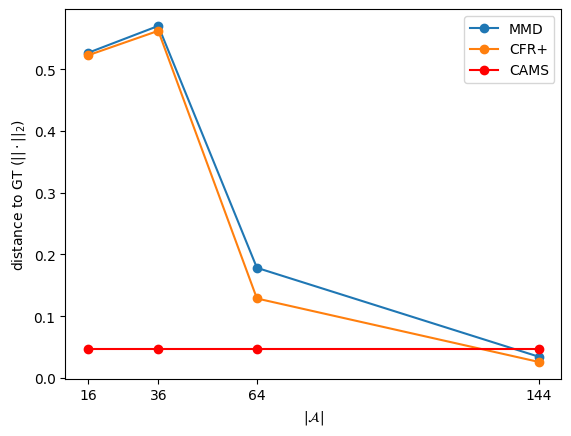

In [45]:
import matplotlib.pyplot as plt
# plt.plot([16, 36, 64, 144], distances, '-o', label='CFR+')
plt.plot([16, 36, 64, 144], distances_mmd, '-o', label='MMD')
plt.plot([16, 36, 64, 144], distances, '-o', label='CFR+')
plt.plot([16, 36, 64, 144], 4*[distances_cams], '-o', color='red', label='CAMS')
plt.xlabel('$|\mathcal{A}|$')
plt.ylabel('distance to GT ($||\cdot||_2$)')
plt.legend()
plt.xticks([16, 36, 64, 144])
plt.show()

In [51]:
distances_mmd

NameError: name 'distances_mmd' is not defined

In [ ]:
distances

In [ ]:
times_mmd = [95.82, 580.64, 2075.61, 12326.18]
times = [8.16, 55.58, 219.95, 1711.67]

In [8]:
plt.plot([16, 36, 64, 144], times_mmd, '-o', label='MMD')
plt.plot([16, 36, 64, 144], times, '-o', label='CFR+')
plt.plot([16, 36, 64, 144], [1.98]*4, '-o', color='red', label='CAMS')
plt.xlabel('$|\mathcal{A}|$')
plt.ylabel('wall time (s)')
plt.legend()
plt.xticks([16, 36, 64, 144])
plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

In [46]:
distance_to_gt_mmd, distance_to_gt_mmd_36

(1.0552507678615948, 1.146136600348143)